In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset (assuming it's a CSV file)
df = pd.read_csv('creditcard.csv')

# Display the first few rows of the dataset
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
# Check the shape of the dataset
print(f"Dataset shape: {df.shape}")

# Check the distribution of the target variable (fraud vs. non-fraud)
print(df['Class'].value_counts())

# Check for missing values
print(df.isnull().sum())


Dataset shape: (284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


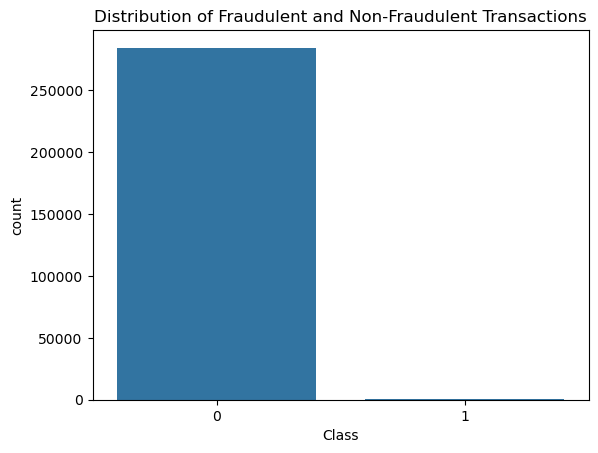

In [3]:
# Visualize the class imbalance
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Class', data=df)
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.show()


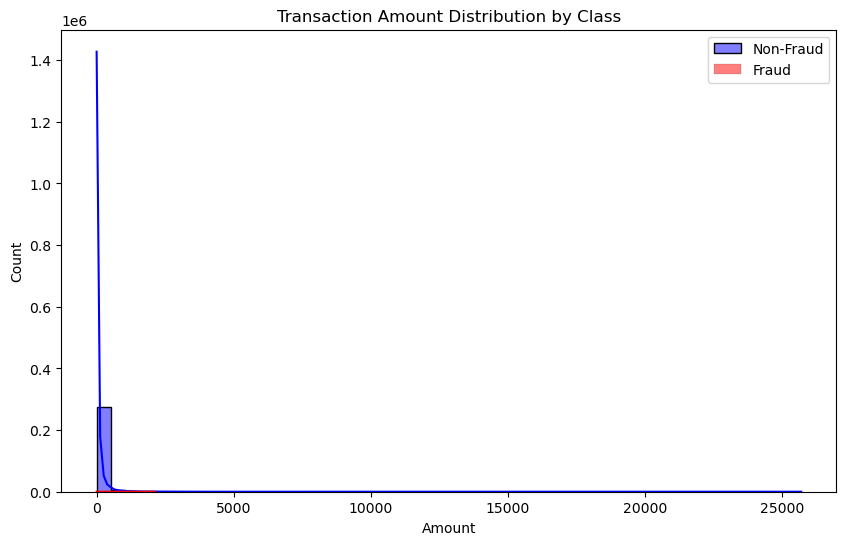

In [4]:
# Plot distribution of amounts for both fraudulent and non-fraudulent transactions
plt.figure(figsize=(10,6))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, color='blue', label='Non-Fraud', kde=True)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, color='red', label='Fraud', kde=True)
plt.legend()
plt.title('Transaction Amount Distribution by Class')
plt.show()


In [5]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling only to the feature columns, excluding the target ('Class')
columns_to_scale = df.columns.difference(['Class'])
df_scaled = df.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the first few rows of the scaled dataset
print(df_scaled.head())


       Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -0.694242 -0.044075  1.672773  0.973366 -0.245117  0.347068   
1 -1.996583  0.608496  0.161176  0.109797  0.316523  0.043483 -0.061820   
2 -1.996562 -0.693500 -0.811578  1.169468  0.268231 -0.364572  1.351454   
3 -1.996562 -0.493325 -0.112169  1.182516 -0.609727 -0.007469  0.936150   
4 -1.996541 -0.591330  0.531541  1.021412  0.284655 -0.295015  0.071999   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.193679  0.082637  0.331128  ... -0.024923  0.382854 -0.176911  0.110507   
1 -0.063700  0.071253 -0.232494  ... -0.307377 -0.880077  0.162201 -0.561131   
2  0.639776  0.207373 -1.378675  ...  0.337632  1.063358  1.456320 -1.138092   
3  0.192071  0.316018 -1.262503  ... -0.147443  0.007267 -0.304777 -1.941027   
4  0.479302 -0.226510  0.744326  ... -0.012839  1.100011 -0.220123  0.233250   

        V25       V26       V27       V28    Amount  Class  
0  0.24

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Separate features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# Scale the 'Amount' and 'Time' columns (the other features are already PCA-transformed)
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance on the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Resampled training set class distribution:", y_train_resampled.value_counts())


Resampled training set class distribution: Class
0    227451
1    227451
Name: count, dtype: int64


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the resampled data
log_reg.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

# ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.93      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Confusion Matrix:
[[55423  1441]
 [    7    91]]
ROC AUC Score: 0.9786401388777233


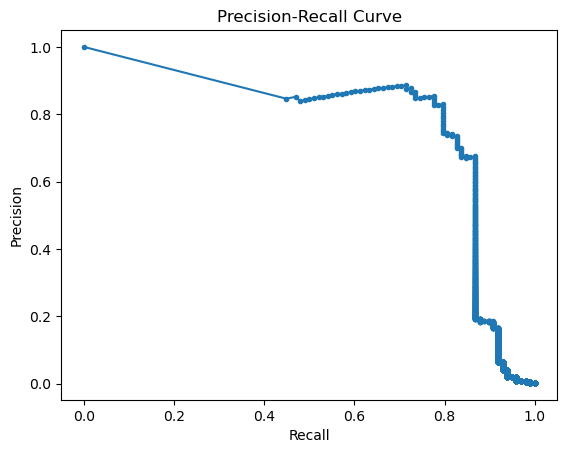

In [14]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Predict probabilities
y_scores = log_reg.predict_proba(X_test)[:, 1]

# Get precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot the curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [16]:
import numpy as np
from sklearn.metrics import precision_recall_curve, roc_auc_score, confusion_matrix, classification_report

# Get the predicted probabilities for the test set
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Define different threshold values to test
thresholds = np.arange(0.1, 1.0, 0.1)

for threshold in thresholds:
    print(f"Threshold: {threshold}")
    
    # Apply the threshold to predict class labels
    y_pred_threshold = (y_prob >= threshold).astype(int)
    
    # Evaluate the model
    print("Classification Report:")
    print(classification_report(y_test, y_pred_threshold))
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_threshold))
    
    print("ROC AUC Score:", roc_auc_score(y_test, y_prob))
    print("\n" + "="*50 + "\n")


Threshold: 0.1
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89     56864
           1       0.01      0.97      0.02        98

    accuracy                           0.80     56962
   macro avg       0.50      0.88      0.45     56962
weighted avg       1.00      0.80      0.88     56962

Confusion Matrix:
[[45210 11654]
 [    3    95]]
ROC AUC Score: 0.9786401388777233


Threshold: 0.2
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56864
           1       0.02      0.96      0.03        98

    accuracy                           0.90     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.90      0.95     56962

Confusion Matrix:
[[51406  5458]
 [    4    94]]
ROC AUC Score: 0.9786401388777233


Threshold: 0.30000000000000004
Classification Report:
              precision    recall  f1-score   

In [19]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Separate features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the undersampler
undersampler = RandomUnderSampler(random_state=42)

# Apply undersampling on the training data
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

# Print the new class distribution after undersampling
print("Undersampled training set class distribution:", y_train_under.value_counts())

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the undersampled data
log_reg.fit(X_train_under, y_train_under)

# Make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

print("ROC AUC Score:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1]))


Undersampled training set class distribution: Class
0    394
1    394
Name: count, dtype: int64
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.93      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.95      0.53     56962
weighted avg       1.00      0.96      0.98     56962

Confusion Matrix:
[[54836  2028]
 [    7    91]]
ROC AUC Score: 0.9793815246976676


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for tuning
param_grid = {
    'solver': ['liblinear', 'saga'],
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'max_iter': [100, 200, 500]
}

# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc', verbose=2, n_jobs=-1)

# Train the model with grid search
grid_search.fit(X_train_resampled, y_train_resampled)

# Display the best parameters
print("Best parameters from grid search: ", grid_search.best_params_)

# Evaluate on the test set using the best estimator
best_log_reg = grid_search.best_estimator_
y_pred_best_log_reg = best_log_reg.predict(X_test)

# Classification report
print("Logistic Regression Classification Report (After Tuning):")
print(classification_report(y_test, y_pred_best_log_reg))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_log_reg))

# ROC AUC score
print("ROC AUC Score:", roc_auc_score(y_test, best_log_reg.predict_proba(X_test)[:,1]))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .............C=0.01, max_iter=100, solver=liblinear; total time=   2.6s
[CV] END .............C=0.01, max_iter=200, solver=liblinear; total time=   1.5s


/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END .............C=0.01, max_iter=100, solver=liblinear; total time=   2.6s
[CV] END .............C=0.01, max_iter=200, solver=liblinear; total time=   1.5s
[CV] END .............C=0.01, max_iter=500, solver=liblinear; total time=   1.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................C=0.01, max_iter=100, solver=saga; total time=  23.7s
[CV] END ..............C=0.1, max_iter=100, solver=liblinear; total time=   1.9s
[CV] END ..............C=0.1, max_iter=100, solver=liblinear; total time=   1.9s
[CV] END ..................C=0.01, max_iter=100, solver=saga; total time=  23.8s
[CV] END ..............C=0.1, max_iter=100, solver=liblinear; total time=   2.0s
[CV] END ..............C=0.1, max_iter=100, solver=liblinear; total time=   1.9s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .............C=0.01, max_iter=200, solver=liblinear; total time=   2.6s
[CV] END ..................C=0.01, max_iter=200, solver=saga; total time=  44.9s
[CV] END ..............C=0.1, max_iter=200, solver=liblinear; total time=   1.9s
[CV] END ..............C=0.1, max_iter=200, solver=liblinear; total time=   1.9s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .............C=0.01, max_iter=100, solver=liblinear; total time=   2.5s
[CV] END .............C=0.01, max_iter=200, solver=liblinear; total time=   1.5s
[CV] END ..................C=0.01, max_iter=200, solver=saga; total time=  44.4s
[CV] END ..............C=0.1, max_iter=200, solver=liblinear; total time=   2.0s
[CV] END ..............C=0.1, max_iter=200, solver=liblinear; total time=   2.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .............C=0.01, max_iter=200, solver=liblinear; total time=   2.6s
[CV] END ..................C=0.01, max_iter=200, solver=saga; total time=  32.1s
[CV] END ...................C=0.1, max_iter=100, solver=saga; total time=  21.9s
[CV] END ..............C=0.1, max_iter=500, solver=liblinear; total time=   1.8s
[CV] END ..............C=0.1, max_iter=500, solver=liblinear; total time=   1.9s
[CV] END ..............C=0.1, max_iter=500, solver=liblinear; total time=   1.8s
[CV] END ..............C=0.1, max_iter=500, solver=liblinear; total time=   1.9s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .............C=0.01, max_iter=100, solver=liblinear; total time=   2.6s
[CV] END ..................C=0.01, max_iter=200, solver=saga; total time=  44.4s
[CV] END ...................C=0.1, max_iter=100, solver=saga; total time=  22.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................C=0.01, max_iter=100, solver=saga; total time=  23.7s
[CV] END ..................C=0.01, max_iter=500, solver=saga; total time= 1.3min
[CV] END ................C=1, max_iter=200, solver=liblinear; total time=   1.9s
[CV] END ..................C=0.01, max_iter=100, solver=saga; total time=  23.5s
[CV] END ..................C=0.01, max_iter=500, solver=saga; total time= 1.3min
[CV] END ................C=1, max_iter=200, solver=liblinear; total time=   1.9s
[CV] END ................C=1, max_iter=200, solver=liblinear; total time=   1.9s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................C=0.01, max_iter=100, solver=saga; total time=  23.6s
[CV] END ..................C=0.01, max_iter=500, solver=saga; total time=  31.0s
[CV] END ...................C=0.1, max_iter=200, solver=saga; total time=  44.0s
[CV] END .....................C=1, max_iter=100, solver=saga; total time=  22.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=0.1, max_iter=200, solver=saga; total time=  43.7s
[CV] END ................C=1, max_iter=100, solver=liblinear; total time=   2.1s
[CV] END .....................C=1, max_iter=100, solver=saga; total time=  22.0s
[CV] END ................C=1, max_iter=500, solver=liblinear; total time=   1.8s
[CV] END ................C=1, max_iter=500, solver=liblinear; total time=   1.8s
[CV] END ................C=1, max_iter=500, solver=liblinear; total time=   2.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max

[CV] END .............C=0.01, max_iter=100, solver=liblinear; total time=   2.6s
[CV] END ..................C=0.01, max_iter=200, solver=saga; total time=  44.5s
[CV] END ...................C=0.1, max_iter=100, solver=saga; total time=  22.4s
[CV] END ...................C=0.1, max_iter=500, solver=saga; total time= 1.8min
[CV] END ....................C=10, max_iter=100, solver=saga; total time=  21.9s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=0.1, max_iter=500, solver=saga; total time= 1.8min
[CV] END ....................C=10, max_iter=100, solver=saga; total time=  21.9s
[CV] END ...............C=10, max_iter=500, solver=liblinear; total time=   2.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .............C=0.01, max_iter=500, solver=liblinear; total time=   1.5s
[CV] END ..................C=0.01, max_iter=500, solver=saga; total time= 1.3min
[CV] END ...................C=0.1, max_iter=500, solver=saga; total time= 1.7min
[CV] END ...............C=10, max_iter=200, solver=liblinear; total time=   1.9s
[CV] END ...............C=10, max_iter=200, solver=liblinear; total time=   1.9s
[CV] END ...............C=10, max_iter=200, solver=liblinear; total time=   1.9s
[CV] END ....................C=10, max_iter=200, solver=saga; total time=  43.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max

[CV] END ...................C=0.1, max_iter=200, solver=saga; total time=  43.8s
[CV] END ................C=1, max_iter=100, solver=liblinear; total time=   2.0s
[CV] END .....................C=1, max_iter=100, solver=saga; total time=  22.2s
[CV] END .....................C=1, max_iter=200, solver=saga; total time=  43.3s
[CV] END .....................C=1, max_iter=500, solver=saga; total time= 1.8min
[CV] END ..............C=100, max_iter=500, solver=liblinear; total time=   1.8s
[CV] END ..............C=100, max_iter=500, solver=liblinear; total time=   1.9s
[CV] END ..............C=100, max_iter=500, solver=liblinear; total time=   2.0s
[CV] END ..............C=100, max_iter=500, solver=liblinear; total time=   1.9s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max

Best parameters from grid search:  {'C': 10, 'max_iter': 100, 'solver': 'liblinear'}
Logistic Regression Classification Report (After Tuning):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56809    55]
 [   98     0]]
ROC AUC Score: 0.49656197242543615


In [ ]:
# Import necessary libraries for SVM
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split

# Assuming X and y are your feature set and labels
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 1: Scale the features for SVM
print("Scaling features for SVM...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Create the SVM model
print("Training SVM model...")
svm_model = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)

# Step 3: Train the SVM model
svm_model.fit(X_train_scaled, y_train)

# Step 4: Make predictions and evaluate the model
print("Evaluating SVM model...")
y_pred = svm_model.predict(X_test_scaled)
y_proba = svm_model.predict_proba(X_test_scaled)[:, 1]  # For ROC AUC

# Step 5: Print classification report and confusion matrix
print("\n--- SVM Model Classification Report ---")
print(classification_report(y_test, y_pred))

print("\n--- SVM Model Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))

# Step 6: ROC AUC Score for SVM
auc = roc_auc_score(y_test, y_proba)
print("\n--- SVM Model ROC AUC Score ---")
print("ROC AUC Score for SVM:", auc)

# Optional: Hyperparameter Tuning with GridSearchCV
print("\n--- Hyperparameter Tuning for SVM ---")
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(probability=True, class_weight='balanced'), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train_scaled, y_train)

# After Tuning: Make predictions and evaluate
print("\nBest parameters found by GridSearchCV:")
print(grid.best_params_)

grid_predictions = grid.best_estimator_.predict(X_test_scaled)
grid_proba = grid.best_estimator_.predict_proba(X_test_scaled)[:, 1]

print("\n--- SVM Model Classification Report (After Hyperparameter Tuning) ---")
print(classification_report(y_test, grid_predictions))

print("\n--- SVM Model Confusion Matrix (After Hyperparameter Tuning) ---")
print(confusion_matrix(y_test, grid_predictions))

# ROC AUC Score after hyperparameter tuning
tuned_auc = roc_auc_score(y_test, grid_proba)
print("\n--- SVM Model ROC AUC Score (After Hyperparameter Tuning) ---")
print("ROC AUC Score (After Hyperparameter Tuning):", tuned_auc)


Scaling features for SVM...
Training SVM model...
[CV] END ................C=1, max_iter=200, solver=liblinear; total time=   2.0s
[CV] END .....................C=1, max_iter=200, solver=saga; total time=  43.4s
[CV] END .....................C=1, max_iter=500, solver=saga; total time= 1.8min
[CV] END ..............C=100, max_iter=200, solver=liblinear; total time=   1.9s
[CV] END ..............C=100, max_iter=200, solver=liblinear; total time=   1.8s
[CV] END ..............C=100, max_iter=200, solver=liblinear; total time=   2.0s
[CV] END ...................C=100, max_iter=200, solver=saga; total time=  43.3s
[CV] END ..............C=0.1, max_iter=100, solver=liblinear; total time=   1.9s
[CV] END ...................C=0.1, max_iter=100, solver=saga; total time=  21.7s
[CV] END ...................C=0.1, max_iter=200, solver=saga; total time=  43.9s
[CV] END ................C=1, max_iter=100, solver=liblinear; total time=   2.0s
[CV] END .....................C=1, max_iter=100, solver=sag

RANDOM FOREST

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize Random Forest with class weights to handle imbalance
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model on the resampled data
rf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("ROC AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.76      0.84        98

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56859     5]
 [   24    74]]
ROC AUC Score: 0.9816611313208458


In [33]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize the AdaBoost classifier
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the model on the resampled data
ada_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_ada = ada_clf.predict(X_test)

# Evaluate the model
print("AdaBoost Classification Report:")
print(classification_report(y_test, y_pred_ada))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ada))

print("ROC AUC Score:", roc_auc_score(y_test, ada_clf.predict_proba(X_test)[:,1]))


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.93      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962

Confusion Matrix:
[[55314  1550]
 [    7    91]]
ROC AUC Score: 0.9779157108116179


In [37]:
pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [39]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize XGBoost classifier with scale_pos_weight to handle imbalance
scale_pos_weight = len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1])
xgb_clf = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)

# Train the model on the resampled data
xgb_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluate the model
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

# ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1]))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.83      0.78        98

    accuracy                           1.00     56962
   macro avg       0.87      0.91      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56836    28]
 [   17    81]]
ROC AUC Score: 0.9901697964638866


Hyperparamter tunning 

In [41]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1])]
}

# Initialize XGBoost
xgb_clf = xgb.XGBClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_clf, param_grid, n_iter=10, scoring='roc_auc', cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train_resampled, y_train_resampled)

# Best parameters
print("Best parameters from RandomizedSearchCV: ", random_search.best_params_)

# Evaluate with the best model
best_xgb = random_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)

# Evaluate performance
print("XGBoost Classification Report (After Tuning):")
print(classification_report(y_test, y_pred_best_xgb))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_xgb))

print("ROC AUC Score:", roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1]))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters from RandomizedSearchCV:  {'subsample': 1.0, 'scale_pos_weight': 1, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
XGBoost Classification Report (After Tuning):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.81      0.79        98

    accuracy                           1.00     56962
   macro avg       0.88      0.90      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56840    24]
 [   19    79]]
ROC AUC Score: 0.9865167015033363


INTERPRETATION

Model Interpretation for Fraud Detection (XGBoost):
Precision of 0.77 for fraud detection means that 77% of the transactions identified as fraudulent are actually fraud, reflecting how well the model is reducing false positives.
Recall of 0.81 indicates that the model correctly identifies 81% of actual fraudulent transactions, capturing the majority of fraud cases while missing only 19%.
ROC AUC Score of 0.987 shows excellent discrimination between fraudulent and non-fraudulent transactions, meaning the model is well-suited to separate the two classes.
Confusion Matrix:
False Negatives: 19 fraudulent transactions misclassified as non-fraudulent.
False Positives: 24 non-fraudulent transactions misclassified as fraudulent.
This tuned XGBoost model provides a good balance of minimizing false positives while capturing most fraudulent cases.






